In [1]:
import pandas as pd
from konlpy.utils import pprint
korean_review_df = pd.read_csv("ratings_test.txt", header=0, delimiter="\t", quoting=3, encoding="utf-8")
#header는 column값이다.
len(korean_review_df)
korean_review_df[:5]
# konlpy 가 한국어 처리 
# pandas read로 파일 들고오고 
# 데이터 개수 확인

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [2]:
from konlpy.tag import Twitter
twi_tagger = Twitter()
temp_sen = u"마늘치킨이 먹고싶닼ㅋㅋ 치킨 사랑해~"
pprint(twi_tagger.pos(temp_sen, norm=True, stem=True))
#pos는 품사, stem 어근 추출
# 품사 붙여주는 게 pos, stemize는 정ㄱ화를 해주는 것. 과거형, 미래형의 어근만 추출해서 동일한 형태로 출력
#먹고싶다 -> 먹다 로 추출해주는게 stem



C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('마늘', 'Noun'),
 ('치킨', 'Noun'),
 ('이', 'Josa'),
 ('먹다', 'Verb'),
 ('ㅋㅋ', 'KoreanParticle'),
 ('치킨', 'Noun'),
 ('사랑', 'Noun'),
 ('하다', 'Verb'),
 ('~', 'Punctuation')]


In [3]:
words_temp = twi_tagger.pos(korean_review_df["document"][3], norm=True, stem=True)
pprint(words_temp)

[('지루하다', 'Adjective'),
 ('않다', 'Verb'),
 ('완전', 'Noun'),
 ('막장', 'Noun'),
 ('임', 'Noun'),
 ('...', 'Punctuation'),
 ('돈', 'Noun'),
 ('주다', 'Verb'),
 ('보기', 'Noun'),
 ('에는', 'Josa'),
 ('....', 'Punctuation')]


In [4]:
# import nltk
# nltk.download()

In [5]:
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer


In [6]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

# [("치킨","None")]
# -->('치킨/None')
#이렇게 바꿔주는 게 tokenizer 함수이다. 품사를 슬러시로 붙여준다. 

In [8]:
def review_to_wordlist(review):
    try:
        review_text = BeautifulSoup(str(review).strip(), 'html.parser').get_text()
# 공백 제거는 strip 이다. 깨끗하게 정리하면서 가져오는 것이 get_text이다.
#BeautifulSoup의 get text를 쓰면 불필요한 공백이나 이런 걸 다 없애준다. 두번쨰 문자열을 html.parser로 하겠다. 
#리뷰로 가져올 때 실수로 가져오는 걸 방지하기 위해 str로 감싼 것이다.

    except AttributeError as e:
        print( e)
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words
words = []
review_num=0
for review in korean_review_df["document"]:
    words += review_to_wordlist(review)
    review_num += 1
    if review_num%5000 == 0:
        print("review_num : %d" % (review_num))
        

review_num : 5000
review_num : 10000
review_num : 15000
review_num : 20000
review_num : 25000
review_num : 30000
review_num : 35000
review_num : 40000
review_num : 45000


C:\Users\user\anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'\xeb\xad\x90\xec\xa7\x80 \xec\x9d\xb4\xec\x98\x81\xed\x99\x94\xeb\x8a\x94.../..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


review_num : 50000


In [9]:
len(words)

723303

In [10]:
import nltk
words_nltk = nltk.Text(words, name='words in movie reviews')
pprint(words_nltk.vocab().most_common(10))

[('./Punctuation', 22620),
 ('영화/Noun', 17328),
 ('하다/Verb', 13750),
 ('이/Josa', 13105),
 ('보다/Verb', 12840),
 ('의/Josa', 10147),
 ('../Punctuation', 9590),
 ('에/Josa', 9044),
 ('가/Josa', 8892),
 ('.../Punctuation', 7716)]


In [12]:
import matplotlib
matplotlib.rc('font',family="HYGOTHIC-Medium")

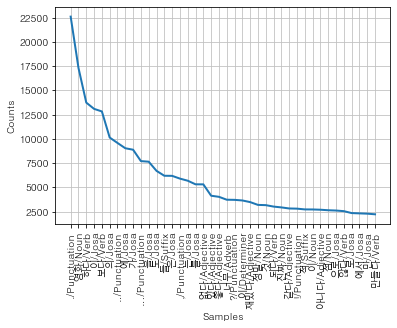

In [13]:
%matplotlib inline
words_nltk.plot(40)

['굳다/Adjective',
 'ㅋ/KoreanParticle',
 '뭐/Noun',
 '이/Noun',
 '평점/Noun',
 '나쁘다/Adjective',
 '않다/Verb',
 '점/Noun',
 '짜다/Verb',
 '리/Noun']
[('영화/Noun', 17328),
 ('하다/Verb', 13750),
 ('보다/Verb', 12840),
 ('없다/Adjective', 5319),
 ('있다/Adjective', 4146),
 ('좋다/Adjective', 4034),
 ('너무/Adverb', 3735),
 ('재밌다/Adjective', 3489),
 ('정말/Noun', 3201),
 ('것/Noun', 3176)]


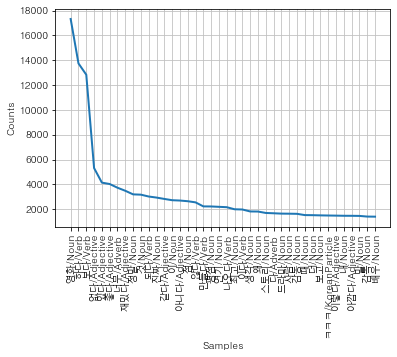

In [15]:
###품사 중 명사, 동사, 형용사, 부사, 감탄사만 추출
Non_Stop_Words = ["Noun", "Verb", "Adjective", "Adverb", "Exclamation", "KoreanParticle"]
words_new = [w for w in words if w.split("/")[-1] in Non_Stop_Words]
pprint(words_new[:10])
words_nltk_new = nltk.Text(words_new, name="new words in movie reviews")
pprint(words_nltk_new.vocab().most_common(10))
words_nltk_new.plot(40)